In [45]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

In [46]:
#loading classrooms
classrooms = pd.read_excel('classrooms.xlsx')['Classroom'].tolist()

#loading teacher-course-department mapping
teachers_df = pd.read_excel('teachers.xlsx')

# courses specific to cse students along with num of credits
courses_df = pd.read_excel('cse_courses.xlsx')
# course_codes = courses_df['Course Code'].dropna().tolist()
course_info = {row['Course Code']: {"name":row['Course Name'], "credits": int(row['Credits'])} for idx,row in courses_df.iterrows()}
course_codes = list(course_info.keys())

#5 class sections
sections = ['cse1', 'cse2', 'cse3', 'cse4', 'cse5']



In [47]:
course_info

{'ECS': {'name': 'Etiquettes and Conversational Skills', 'credits': 2},
 'DC&CN': {'name': 'Data Communications & Computer Networks', 'credits': 3},
 'DAA': {'name': 'Design and Analysis of Algorithms', 'credits': 3},
 'DBMS': {'name': 'Database Management System', 'credits': 3},
 'WEB PROG.': {'name': 'Web Programming', 'credits': 2},
 'JAVA PROG': {'name': 'Java Programing', 'credits': 3},
 'OS SYS.': {'name': 'Operating Systems', 'credits': 3},
 'PRJ I': {'name': 'Project I', 'credits': 1}}

In [48]:
course_codes

['ECS', 'DC&CN', 'DAA', 'DBMS', 'WEB PROG.', 'JAVA PROG', 'OS SYS.', 'PRJ I']

In [49]:
# type(classrooms)
# type(teachers_df)
teachers_df

,Faculty,Course Code,Department
0,Mr. Beenu Taneja,ECS,CSE
1,Dr Shakti Kundu,DC&CN,CSE
2,Dr Soharab Hossain,DAA,CSE
3,Dr Kiran Sharma,DBMS,CSE
4,Dr Kiran Khatter,WEB PROG.,CSE
5,Dr Nikhil Kumar,JAVA PROG,CSE
6,Dr Saurabh Mishra,OS SYS.,CSE
7,Dr. Anubhav Agrawal.,PRJ I,CSE
8,Mr. Beenu Taneja,ECS,CSE
9,Dr Pramod Kumar,DC&CN,CSE


In [50]:
#each day has 8 periods
time_slots = [
    '9:15-10:10', '10:10-11:05', '11:05-12:00', '12:00-12:55',
    '12:55-1:50', '2:15-3:10', '3:10-4:05', '4:05-5:10'
]

lunch_slot_index = 5  # 2:15-3:10
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


In [55]:
# section_course_teacher = {}   # (section, course) -> teacher
# for sec in sections:
#     print("CSE Section: ",sec)
#     for course in course_codes:
#         print("Course: ",course)
#         possible_teachers = teachers_df[
#             (teachers_df['Course Code'] == course) &
#             (teachers_df['Department'].str.upper() == 'CSE')
#         ]['Faculty'].tolist()
#         possible_teachers=list(set(possible_teachers))
#         print("Possible Teachers: ",possible_teachers)
#         #assigning a random teacher
#         if len(possible_teachers) == 0:
#             teacher = "TBA"
#             print(f"WARNING: No teacher available for {course}")
#         else:
#             teacher = random.choice(possible_teachers)
#         section_course_teacher[(sec, course)] = teacher
#         print("Teacher assigned: ",teacher)

course_to_teacher_list = {}
for course in course_codes:
    teachers = teachers_df[
        (teachers_df['Course Code'] == course) &
        (teachers_df['Department'].str.upper() == 'CSE')
    ]['Faculty'].dropna().unique().tolist()
    random.shuffle(teachers)  # shuffle for fairness
    course_to_teacher_list[course] = teachers

section_course_teacher = {}
for sec_index, sec in enumerate(sections):
    for course in course_codes:
        teachers_for_course = course_to_teacher_list.get(course, [])
        if not teachers_for_course:
            teacher = "TBA"
            print(f"WARNING: No teacher found for course '{course}'")
        else:
            teacher = teachers_for_course[sec_index % len(teachers_for_course)]
        section_course_teacher[(sec, course)] = teacher

In [56]:
section_course_teacher

{('cse1', 'ECS'): 'Mr. Beenu Taneja',
 ('cse1', 'DC&CN'): 'Dr Shakti Kundu',
 ('cse1', 'DAA'): 'Dr Sukhandeep Kaur',
 ('cse1', 'DBMS'): 'Dr Kiran Sharma',
 ('cse1', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse1', 'JAVA PROG'): 'Dr Nitin  Varyani',
 ('cse1', 'OS SYS.'): 'Dr Shilpa Mahajan',
 ('cse1', 'PRJ I'): 'Dr. Anubhav Agrawal.',
 ('cse2', 'ECS'): 'Mr. Shaganinder Singh Sidhu',
 ('cse2', 'DC&CN'): 'Dr Sandeep Kumar',
 ('cse2', 'DAA'): 'Dr Soharab Hossain',
 ('cse2', 'DBMS'): 'Dr Nishtha Phutela',
 ('cse2', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse2', 'JAVA PROG'): 'Dr Nikhil Kumar',
 ('cse2', 'OS SYS.'): 'Ms. Monika Mokan',
 ('cse2', 'PRJ I'): 'Dr. Anubhav Agrawal.',
 ('cse3', 'ECS'): 'Mr. Beenu Taneja',
 ('cse3', 'DC&CN'): 'Dr Abhishek Jain',
 ('cse3', 'DAA'): 'Dr. Meenakshi Malik',
 ('cse3', 'DBMS'): 'Dr Kiran Sharma',
 ('cse3', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse3', 'JAVA PROG'): 'Dr Nitin  Varyani',
 ('cse3', 'OS SYS.'): 'Dr Saurabh Mishra',
 ('cse3', 'PRJ I'): 'Dr. Anubhav Agra

In [60]:
assignments = []  # (dept, section, course, teacher, instance_index)
for sec in sections:
    for course in course_codes:
        credits = course_info[course]['credits']
        teacher = section_course_teacher[(sec, course)]
        for inst in range(1,credits+1):
            assignments.append(('CSE', sec, course, teacher, inst))

In [61]:
assignments

[('CSE', 'cse1', 'ECS', 'Mr. Beenu Taneja', 1),
 ('CSE', 'cse1', 'ECS', 'Mr. Beenu Taneja', 2),
 ('CSE', 'cse1', 'DC&CN', 'Dr Shakti Kundu', 1),
 ('CSE', 'cse1', 'DC&CN', 'Dr Shakti Kundu', 2),
 ('CSE', 'cse1', 'DC&CN', 'Dr Shakti Kundu', 3),
 ('CSE', 'cse1', 'DAA', 'Dr Sukhandeep Kaur', 1),
 ('CSE', 'cse1', 'DAA', 'Dr Sukhandeep Kaur', 2),
 ('CSE', 'cse1', 'DAA', 'Dr Sukhandeep Kaur', 3),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 1),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 2),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 3),
 ('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 1),
 ('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 2),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 1),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 2),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 3),
 ('CSE', 'cse1', 'OS SYS.', 'Dr Shilpa Mahajan', 1),
 ('CSE', 'cse1', 'OS SYS.', 'Dr Shilpa Mahajan', 2),
 ('CSE', 'cse1', 'OS SYS.', 'Dr Shilpa Mahajan', 3),
 ('CSE', 'cse1', 'PRJ I', 'Dr. 

In [64]:
#building the conflict graph
G = nx.Graph()

# adding one one node for each assignment
for n in assignments:
    G.add_node(n)

for i, n1 in enumerate(assignments):
    for j in range(i + 1, len(assignments)):
        n2 = assignments[j]
        #skipping same instance of the same class
        if n1[1] == n2[1] and n1[2] == n2[2] and n1[4] == n2[4]:
            continue
        #as one section can't have different classes simultaneously
        if n1[1] == n2[1]:
            G.add_edge(n1, n2)
        #one teacher cannot be teaching two classes simultaneously
        if n1[3] == n2[3]:
            G.add_edge(n1, n2)

In [65]:
# coloring the graph
# by assigning unique colors to n=unique timeslots
coloring = nx.coloring.greedy_color(G, strategy='largest_first')

In [67]:
#print the colors assigned to each course
for course, color in coloring.items():
    print(f"{course}: Color {color}")

('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 0
('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 1
('CSE', 'cse2', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 2
('CSE', 'cse2', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 3
('CSE', 'cse3', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 4
('CSE', 'cse3', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 5
('CSE', 'cse4', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 6
('CSE', 'cse4', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 7
('CSE', 'cse5', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 8
('CSE', 'cse5', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 9
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 1): Color 2
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 2): Color 3
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 3): Color 4
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 1): Color 5
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 2): Color 6
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 3): Color 7
('CSE', 'cse3', 'DBMS', 'Dr Kiran Sharm

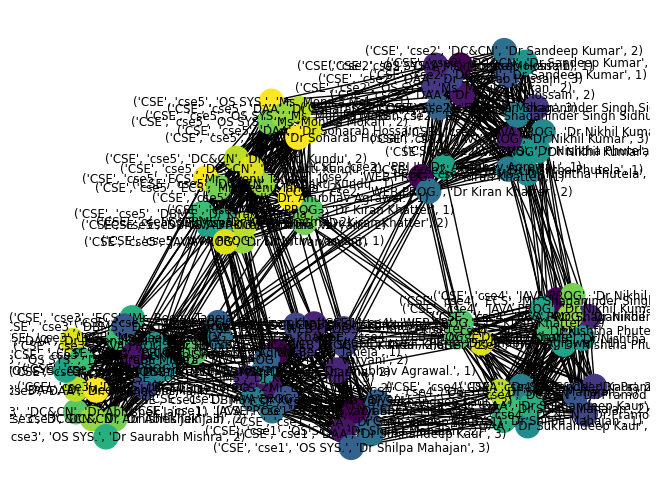

In [68]:
#drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(coloring.values()), cmap=plt.cm.viridis, font_color='black',font_size=8.5)
plt.show()